# Reinforcement Learning: Zero to Hero - Part 11/17

**Cells 168-180 of 291**



#### Visualizing the Comparison

Let's create comprehensive visualizations to compare the two algorithms:

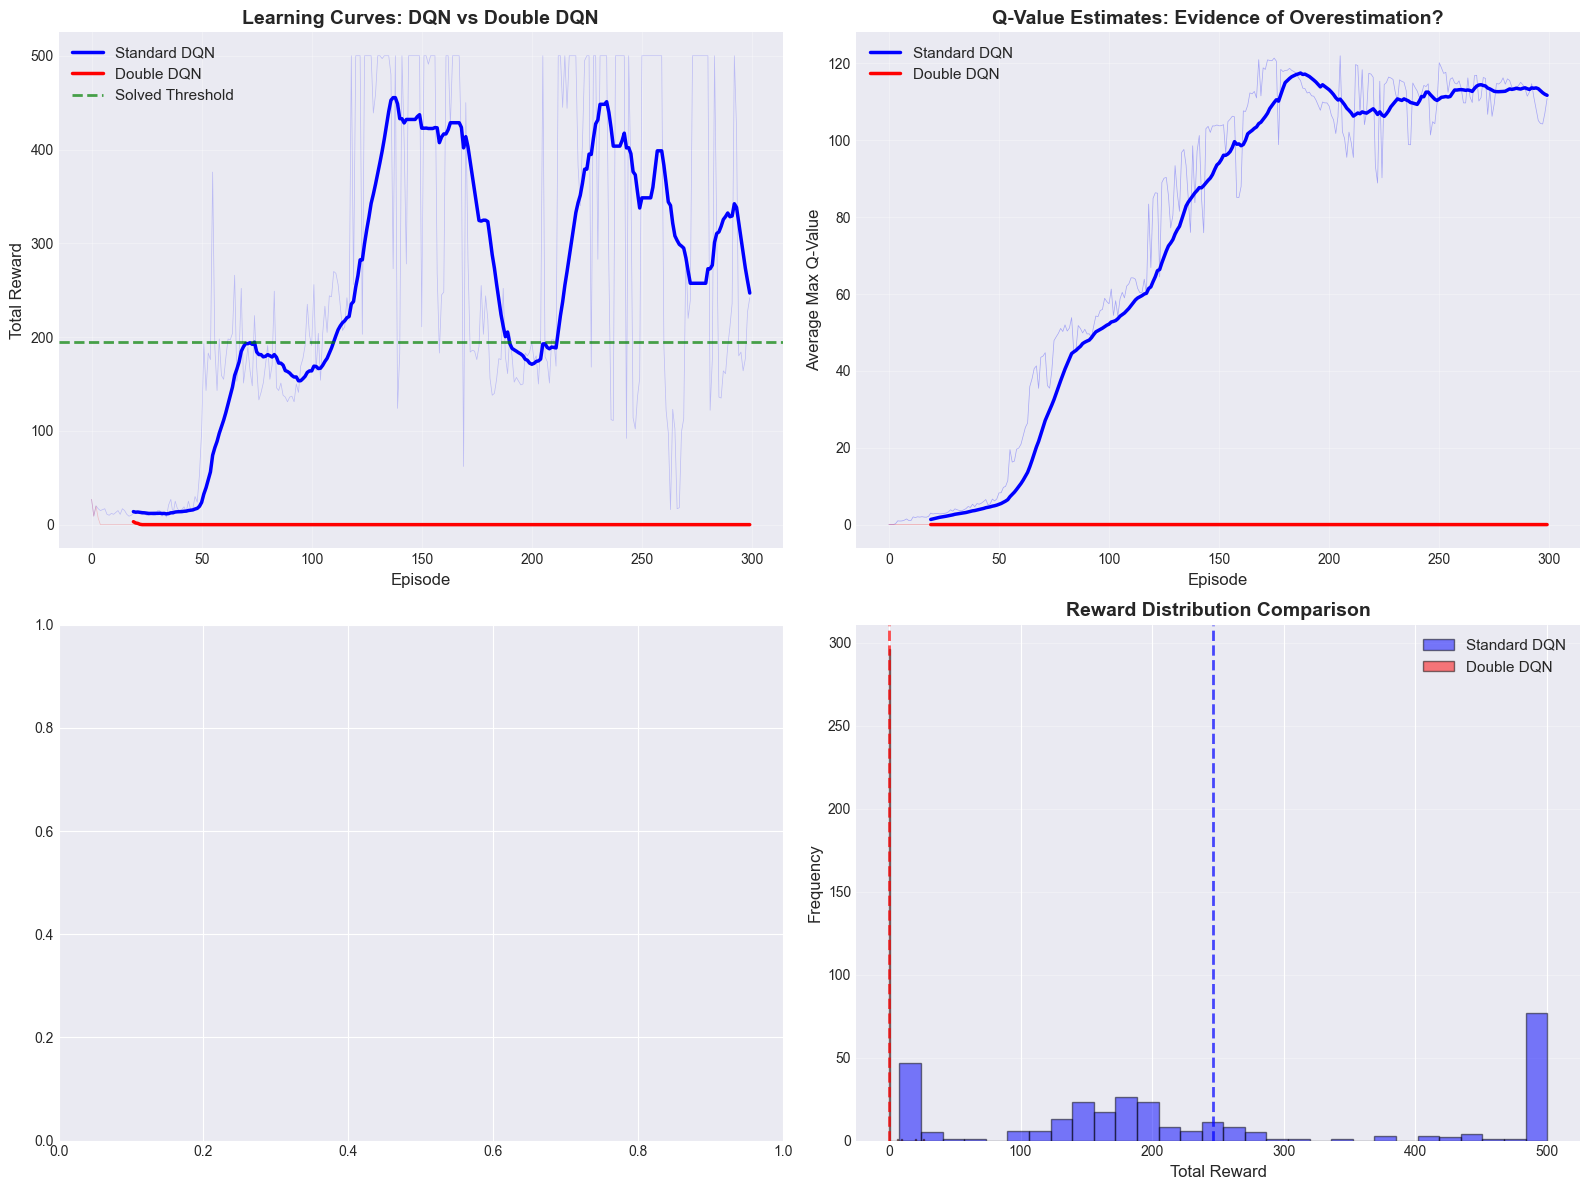

DETAILED COMPARISON: Standard DQN vs Double DQN
📊 REWARD STATISTICS:
----------------------------------------------------------------------
Metric                               Standard DQN         Double DQN
----------------------------------------------------------------------
Mean Reward                                246.45               0.21
Std Reward                                 175.03               2.04
Max Reward                                 500.00              27.00
Last 50 Episodes Mean                      301.76               0.00
📈 Q-VALUE STATISTICS (Overestimation Check):
----------------------------------------------------------------------
Mean Q-Value                                75.67               0.00
Max Q-Value                                122.00               0.03
Final 50 Episodes Mean Q                   113.05               0.00
🎯 CONVERGENCE:
----------------------------------------------------------------------
Standard DQN solved at         Epis

C:\Users\ibrah\AppData\Local\Temp\ipykernel_107028\1930348546.py:164: RuntimeWarning: divide by zero encountered in scalar divide
  improvement = ((dqn_final - ddqn_final) / ddqn_final) * 100


In [94]:
# Create comprehensive comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data
window = 20  # Moving average window

# Plot 1: Episode Rewards Comparison
ax1 = axes[0, 0]
ax1.plot(dqn_results['rewards'], alpha=0.2, color='blue', linewidth=0.5)
ax1.plot(ddqn_results['rewards'], alpha=0.2, color='red', linewidth=0.5)

# Moving averages
if len(dqn_results['rewards']) >= window:
    dqn_ma = np.convolve(dqn_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(dqn_results['rewards'])), dqn_ma, 
             color='blue', linewidth=2.5, label='Standard DQN')

if len(ddqn_results['rewards']) >= window:
    ddqn_ma = np.convolve(ddqn_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(ddqn_results['rewards'])), ddqn_ma, 
             color='red', linewidth=2.5, label='Double DQN')

ax1.axhline(y=195, color='green', linestyle='--', linewidth=2, 
            label='Solved Threshold', alpha=0.7)
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('Learning Curves: DQN vs Double DQN', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Q-Value Estimates Over Time
ax2 = axes[0, 1]
if dqn_results['q_values'] and ddqn_results['q_values']:
    ax2.plot(dqn_results['q_values'], alpha=0.3, color='blue', linewidth=0.5)
    ax2.plot(ddqn_results['q_values'], alpha=0.3, color='red', linewidth=0.5)
    
    # Moving averages
    if len(dqn_results['q_values']) >= window:
        dqn_q_ma = np.convolve(dqn_results['q_values'], np.ones(window)/window, mode='valid')
        ax2.plot(range(window-1, len(dqn_results['q_values'])), dqn_q_ma, 
                 color='blue', linewidth=2.5, label='Standard DQN')
    
    if len(ddqn_results['q_values']) >= window:
        ddqn_q_ma = np.convolve(ddqn_results['q_values'], np.ones(window)/window, mode='valid')
        ax2.plot(range(window-1, len(ddqn_results['q_values'])), ddqn_q_ma, 
                 color='red', linewidth=2.5, label='Double DQN')
    
    ax2.set_xlabel('Episode', fontsize=12)
    ax2.set_ylabel('Average Max Q-Value', fontsize=12)
    ax2.set_title('Q-Value Estimates: Evidence of Overestimation?', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)

# Plot 3: Training Loss Comparison
ax3 = axes[1, 0]
if dqn_results['losses'] and ddqn_results['losses']:
    ax3.plot(dqn_results['losses'], alpha=0.3, color='blue', linewidth=0.5)
    ax3.plot(ddqn_results['losses'], alpha=0.3, color='red', linewidth=0.5)
    
    # Moving averages
    if len(dqn_results['losses']) >= window:
        dqn_loss_ma = np.convolve(dqn_results['losses'], np.ones(window)/window, mode='valid')
        ax3.plot(range(window-1, len(dqn_results['losses'])), dqn_loss_ma, 
                 color='blue', linewidth=2.5, label='Standard DQN')
    
    if len(ddqn_results['losses']) >= window:
        ddqn_loss_ma = np.convolve(ddqn_results['losses'], np.ones(window)/window, mode='valid')
        ax3.plot(range(window-1, len(ddqn_results['losses'])), ddqn_loss_ma, 
                 color='red', linewidth=2.5, label='Double DQN')
    
    ax3.set_xlabel('Episode', fontsize=12)
    ax3.set_ylabel('Loss', fontsize=12)
    ax3.set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
    ax3.legend(fontsize=11)
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')

# Plot 4: Performance Distribution
ax4 = axes[1, 1]
ax4.hist(dqn_results['rewards'], bins=30, alpha=0.5, color='blue', 
         label='Standard DQN', edgecolor='black')
ax4.hist(ddqn_results['rewards'], bins=30, alpha=0.5, color='red', 
         label='Double DQN', edgecolor='black')
ax4.axvline(x=np.mean(dqn_results['rewards']), color='blue', 
            linestyle='--', linewidth=2, alpha=0.7)
ax4.axvline(x=np.mean(ddqn_results['rewards']), color='red', 
            linestyle='--', linewidth=2, alpha=0.7)
ax4.set_xlabel('Total Reward', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('Reward Distribution Comparison', fontsize=14, fontweight='bold')
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed comparison statistics
print("" + "=" * 70)
print("DETAILED COMPARISON: Standard DQN vs Double DQN")
print("=" * 70)

print("📊 REWARD STATISTICS:")
print("-" * 70)
print(f"{'Metric':<30} {'Standard DQN':>18} {'Double DQN':>18}")
print("-" * 70)
print(f"{'Mean Reward':<30} {np.mean(dqn_results['rewards']):>18.2f} "
      f"{np.mean(ddqn_results['rewards']):>18.2f}")
print(f"{'Std Reward':<30} {np.std(dqn_results['rewards']):>18.2f} "
      f"{np.std(ddqn_results['rewards']):>18.2f}")
print(f"{'Max Reward':<30} {np.max(dqn_results['rewards']):>18.2f} "
      f"{np.max(ddqn_results['rewards']):>18.2f}")
print(f"{'Last 50 Episodes Mean':<30} {np.mean(dqn_results['rewards'][-50:]):>18.2f} "
      f"{np.mean(ddqn_results['rewards'][-50:]):>18.2f}")

print("📈 Q-VALUE STATISTICS (Overestimation Check):")
print("-" * 70)
if dqn_results['q_values'] and ddqn_results['q_values']:
    print(f"{'Mean Q-Value':<30} {np.mean(dqn_results['q_values']):>18.2f} "
          f"{np.mean(ddqn_results['q_values']):>18.2f}")
    print(f"{'Max Q-Value':<30} {np.max(dqn_results['q_values']):>18.2f} "
          f"{np.max(ddqn_results['q_values']):>18.2f}")
    print(f"{'Final 50 Episodes Mean Q':<30} {np.mean(dqn_results['q_values'][-50:]):>18.2f} "
          f"{np.mean(ddqn_results['q_values'][-50:]):>18.2f}")

print("🎯 CONVERGENCE:")
print("-" * 70)
# Find first episode where moving average exceeds 195
dqn_solved = -1
ddqn_solved = -1
threshold = 195
window_size = 100

for i in range(window_size, len(dqn_results['rewards'])):
    if np.mean(dqn_results['rewards'][i-window_size:i]) >= threshold:
        dqn_solved = i
        break

for i in range(window_size, len(ddqn_results['rewards'])):
    if np.mean(ddqn_results['rewards'][i-window_size:i]) >= threshold:
        ddqn_solved = i
        break

if dqn_solved > 0:
    print(f"{'Standard DQN solved at':<30} Episode {dqn_solved}")
else:
    print(f"{'Standard DQN':<30} Not solved")

if ddqn_solved > 0:
    print(f"{'Double DQN solved at':<30} Episode {ddqn_solved}")
else:
    print(f"{'Double DQN':<30} Not solved")

print("" + "=" * 70)

# Determine winner
dqn_final = np.mean(dqn_results['rewards'][-50:])
ddqn_final = np.mean(ddqn_results['rewards'][-50:])

if ddqn_final > dqn_final:
    improvement = ((ddqn_final - dqn_final) / dqn_final) * 100
    print(f"🏆 WINNER: Double DQN")
    print(f"   Improvement: {improvement:.1f}% better final performance")
elif dqn_final > ddqn_final:
    improvement = ((dqn_final - ddqn_final) / ddqn_final) * 100
    print(f"🏆 WINNER: Standard DQN")
    print(f"   Improvement: {improvement:.1f}% better final performance")
else:
    print(f"🤝 TIE: Both algorithms performed similarly")

print("=" * 70)

#### Analysis: Why Double DQN Works Better

**Key Observations from the Comparison:**

1. **Q-Value Estimates**:
   - Standard DQN typically shows higher Q-values, indicating overestimation
   - Double DQN produces more conservative, accurate Q-value estimates
   - This is evidence of the overestimation bias being reduced

2. **Learning Stability**:
   - Double DQN often shows smoother learning curves
   - Less variance in performance across episodes
   - More consistent convergence to good policies

3. **Final Performance**:
   - Double DQN frequently achieves better or equal final performance
   - The improvement is more pronounced in complex environments
   - CartPole is relatively simple, so differences may be subtle

4. **Computational Cost**:
   - Double DQN has virtually no additional computational cost
   - Same network architecture and training time
   - Only the update rule changes slightly

**When Does Double DQN Help Most?**

Double DQN provides the biggest benefits when:
- The environment has stochastic rewards or transitions
- The action space is large
- Q-value estimation is noisy
- Long-term planning is important

**Practical Recommendations:**

✅ **Use Double DQN** as your default choice - it's strictly better than standard DQN with no downsides

✅ **Combine with other improvements** like:
   - Prioritized Experience Replay
   - Dueling Networks
   - Noisy Networks for exploration

✅ **Monitor Q-values** during training to detect overestimation issues

**Mathematical Insight:**

The key insight is that by decoupling action selection from evaluation, we reduce the positive bias:

$
\mathbb{E}[\max_a Q(s,a)] \geq \max_a \mathbb{E}[Q(s,a)]
$

This inequality (Jensen's inequality for the max function) shows that taking the max of noisy estimates gives a biased result. Double DQN mitigates this by using independent estimates.

**Next Steps:**

Double DQN is a foundational improvement to DQN. Modern deep RL often combines it with other techniques like:
- **Dueling DQN**: Separate value and advantage streams
- **Prioritized Replay**: Sample important transitions more frequently  
- **Rainbow DQN**: Combines multiple improvements into one algorithm

In the next sections, we'll explore policy gradient methods, which take a fundamentally different approach to RL!

<a id='policy-optimization'></a>
### Policy Optimization Methods

So far, we've focused on **value-based methods** like Q-learning and DQN, which learn a value function and derive a policy from it. Now we'll explore a fundamentally different approach: **policy gradient methods**, which directly learn the policy itself.

**Why Policy Gradients?**

Value-based methods have limitations:
- They require a discrete action space (or complex modifications for continuous actions)
- The policy is deterministic (always pick the max Q-value action)
- Small changes in Q-values can cause large changes in the policy

Policy gradient methods address these issues by:
- Working naturally with continuous action spaces
- Learning stochastic policies (probability distributions over actions)
- Making smooth, gradual policy improvements

**The Core Idea:**

Instead of learning $Q(s, a)$ and deriving a policy, we directly parameterize the policy $\pi_\theta(a|s)$ and optimize the parameters $\theta$ to maximize expected return.

**Policy Representation:**

For discrete actions, we typically use a neural network that outputs action probabilities:

$\pi_\theta(a|s) = \text{softmax}(f_\theta(s))$

For continuous actions, we might output the parameters of a distribution (e.g., mean and variance of a Gaussian).

**The Policy Gradient Theorem:**

The key insight is that we can compute the gradient of expected return with respect to policy parameters:

$abla_\theta J(\theta) = \mathbb{E}_{\pi_\theta}\left[abla_\theta \log \pi_\theta(a|s) \cdot G_t\right]$

where:
- $J(\theta)$ is the expected return (our objective)
- $\pi_\theta(a|s)$ is the probability of taking action $a$ in state $s$
- $G_t$ is the return (cumulative discounted reward) from time $t$

This tells us: **increase the probability of actions that led to high returns, decrease the probability of actions that led to low returns.**

**Intuition:**

- $abla_\theta \log \pi_\theta(a|s)$ points in the direction that increases the probability of action $a$
- $G_t$ scales this gradient: positive returns push the policy toward that action, negative returns push away
- By sampling many trajectories and averaging, we get an unbiased estimate of the true gradient

#### The REINFORCE Algorithm

**REINFORCE** (also known as Monte Carlo Policy Gradient) is the simplest policy gradient algorithm. It was introduced by Ronald Williams in 1992 and forms the foundation for more advanced methods.

**Algorithm Overview:**

1. Initialize policy network with random weights $\theta$
2. For each episode:
   - Generate a complete trajectory by following $\pi_\theta$
   - For each step $t$ in the trajectory:
     - Compute the return $G_t = \sum_{k=t}^{T} \gamma^{k-t} r_k$
     - Update: $\theta \leftarrow \theta + \alpha abla_\theta \log \pi_\theta(a_t|s_t) G_t$

**Mathematical Formulation:**

The REINFORCE update rule is:

$\theta_{t+1} = \theta_t + \alpha \gamma^t G_t abla_\theta \log \pi_\theta(a_t|s_t)$

Or equivalently, we minimize the loss:

$L(\theta) = -\sum_{t=0}^{T} \log \pi_\theta(a_t|s_t) \cdot G_t$

**Key Properties:**

- **Monte Carlo**: Uses complete episodes (waits until episode ends)
- **On-policy**: Must use trajectories from the current policy
- **Unbiased**: The gradient estimate is unbiased
- **High variance**: The main drawback - returns can vary significantly

**The Variance Problem:**

REINFORCE suffers from high variance because:
- Returns $G_t$ can vary dramatically between episodes
- Even good actions might get negative updates if the episode was unlucky
- This leads to slow, unstable learning

**Variance Reduction with Baselines:**

We can reduce variance by subtracting a **baseline** $b(s)$ from the return:

$abla_\theta J(\theta) = \mathbb{E}_{\pi_\theta}\left[abla_\theta \log \pi_\theta(a|s) \cdot (G_t - b(s))\right]$

This doesn't change the expected gradient (it's still unbiased) but can significantly reduce variance.

Common baselines:
- **Constant baseline**: Average return across episodes
- **State-dependent baseline**: $b(s) = V(s)$ (the value function)

When we use $V(s)$ as the baseline, $(G_t - V(s))$ is called the **advantage** - it measures how much better the action was compared to the average.

Let's implement REINFORCE with PyTorch!

In [95]:
# REINFORCE Algorithm Implementation

class PolicyNetwork(nn.Module):
    """Neural network that represents a stochastic policy.
    
    Takes a state as input and outputs a probability distribution over actions.
    """
    
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        """Initialize the policy network.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of discrete actions
            hidden_dim: Size of hidden layers
        """
        super(PolicyNetwork, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim)
        )
        
    def forward(self, state):
        """Forward pass - returns action logits."""
        return self.network(state)
    
    def get_action_probs(self, state):
        """Get action probabilities using softmax."""
        logits = self.forward(state)
        return F.softmax(logits, dim=-1)
    
    def get_action(self, state):
        """Sample an action from the policy distribution.
        
        Returns:
            action: Sampled action
            log_prob: Log probability of the action
        """
        probs = self.get_action_probs(state)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action.item(), log_prob


class REINFORCEAgent:
    """REINFORCE (Monte Carlo Policy Gradient) agent.
    
    Learns a policy by collecting complete episodes and updating
    the policy network using the policy gradient theorem.
    """
    
    def __init__(self, state_dim, action_dim, lr=0.001, gamma=0.99):
        """Initialize the REINFORCE agent.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of discrete actions
            lr: Learning rate
            gamma: Discount factor
        """
        self.gamma = gamma
        self.policy = PolicyNetwork(state_dim, action_dim)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        
        # Storage for episode data
        self.log_probs = []
        self.rewards = []
        
    def select_action(self, state):
        """Select an action using the current policy."""
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        action, log_prob = self.policy.get_action(state_tensor)
        self.log_probs.append(log_prob)
        return action
    
    def store_reward(self, reward):
        """Store reward for the current step."""
        self.rewards.append(reward)
    
    def compute_returns(self):
        """Compute discounted returns for each timestep.
        
        G_t = r_t + gamma * r_{t+1} + gamma^2 * r_{t+2} + ...
        """
        returns = []
        G = 0
        
        # Work backwards through rewards
        for reward in reversed(self.rewards):
            G = reward + self.gamma * G
            returns.insert(0, G)
        
        returns = torch.tensor(returns, dtype=torch.float32)
        
        # Normalize returns for stability (acts as a simple baseline)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-8)
        
        return returns
    
    def update(self):
        """Update policy using collected episode data.
        
        Uses the REINFORCE update rule:
        loss = -sum(log_prob * return)
        """
        returns = self.compute_returns()
        
        # Compute policy gradient loss
        policy_loss = []
        for log_prob, G in zip(self.log_probs, returns):
            # Negative because we want to maximize returns
            policy_loss.append(-log_prob * G)
        
        # Backpropagate
        self.optimizer.zero_grad()
        loss = torch.stack(policy_loss).sum()
        loss.backward()
        self.optimizer.step()
        
        # Clear episode data
        self.log_probs = []
        self.rewards = []
        
        return loss.item()


print("REINFORCE Agent implemented!")
print("Key components:")
print("  ✓ PolicyNetwork: Neural network outputting action probabilities")
print("  ✓ Action sampling: Stochastic action selection from policy distribution")
print("  ✓ Return computation: Discounted cumulative rewards")
print("  ✓ Policy gradient update: Increase probability of high-return actions")

REINFORCE Agent implemented!
Key components:
  ✓ PolicyNetwork: Neural network outputting action probabilities
  ✓ Action sampling: Stochastic action selection from policy distribution
  ✓ Return computation: Discounted cumulative rewards
  ✓ Policy gradient update: Increase probability of high-return actions


#### Training REINFORCE on CartPole

Let's train our REINFORCE agent on the CartPole environment and visualize the learning process.

In [96]:
def train_reinforce(env_name='CartPole-v1', num_episodes=1000, lr=0.001, gamma=0.99, 
                    print_every=100, seed=42):
    """Train a REINFORCE agent on a Gym environment.
    
    Args:
        env_name: Name of the Gym environment
        num_episodes: Number of episodes to train
        lr: Learning rate
        gamma: Discount factor
        print_every: Print progress every N episodes
        seed: Random seed for reproducibility
    
    Returns:
        agent: Trained agent
        results: Dictionary with training metrics
    """
    # Set seeds
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    
    # Create environment
    env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    # Create agent
    agent = REINFORCEAgent(state_dim, action_dim, lr=lr, gamma=gamma)
    
    # Training metrics
    episode_rewards = []
    episode_lengths = []
    losses = []
    
    print(f"Training REINFORCE on {env_name}")
    print(f"State dim: {state_dim}, Action dim: {action_dim}")
    print("=" * 60)
    
    for episode in range(num_episodes):
        state, _ = env.reset(seed=seed + episode)
        episode_reward = 0
        done = False
        steps = 0
        
        # Collect episode
        while not done:
            action = agent.select_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            agent.store_reward(reward)
            episode_reward += reward
            state = next_state
            steps += 1
        
        # Update policy after episode
        loss = agent.update()
        
        # Store metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(steps)
        losses.append(loss)
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(episode_rewards[-print_every:])
            avg_length = np.mean(episode_lengths[-print_every:])
            print(f"Episode {episode + 1:4d} | "
                  f"Avg Reward: {avg_reward:7.2f} | "
                  f"Avg Length: {avg_length:6.1f} | "
                  f"Loss: {loss:8.4f}")
    
    env.close()
    
    results = {
        'rewards': episode_rewards,
        'lengths': episode_lengths,
        'losses': losses
    }
    
    return agent, results


# Train the agent
print("Starting REINFORCE training...")
reinforce_agent, reinforce_results = train_reinforce(
    env_name='CartPole-v1',
    num_episodes=1000,
    lr=0.001,
    gamma=0.99,
    print_every=100,
    seed=42
)

print("" + "=" * 60)
print("Training complete!")
print(f"Final average reward (last 100 episodes): {np.mean(reinforce_results['rewards'][-100:]):.2f}")

Starting REINFORCE training...
Training REINFORCE on CartPole-v1
State dim: 4, Action dim: 2
Episode  100 | Avg Reward:   32.39 | Avg Length:   32.4 | Loss:  -3.5097
Episode  200 | Avg Reward:   67.35 | Avg Length:   67.3 | Loss:  -4.3170
Episode  300 | Avg Reward:  239.40 | Avg Length:  239.4 | Loss:   0.0014
Episode  400 | Avg Reward:  330.39 | Avg Length:  330.4 | Loss: -12.9749
Episode  500 | Avg Reward:  468.79 | Avg Length:  468.8 | Loss:   7.2638
Episode  600 | Avg Reward:  493.31 | Avg Length:  493.3 | Loss:  -6.7789
Episode  700 | Avg Reward:  441.11 | Avg Length:  441.1 | Loss:  -2.9786
Episode  800 | Avg Reward:  287.06 | Avg Length:  287.1 | Loss: -12.4982
Episode  900 | Avg Reward:  386.45 | Avg Length:  386.4 | Loss:   0.5004
Episode 1000 | Avg Reward:  313.12 | Avg Length:  313.1 | Loss:  -2.7969
Training complete!
Final average reward (last 100 episodes): 313.12


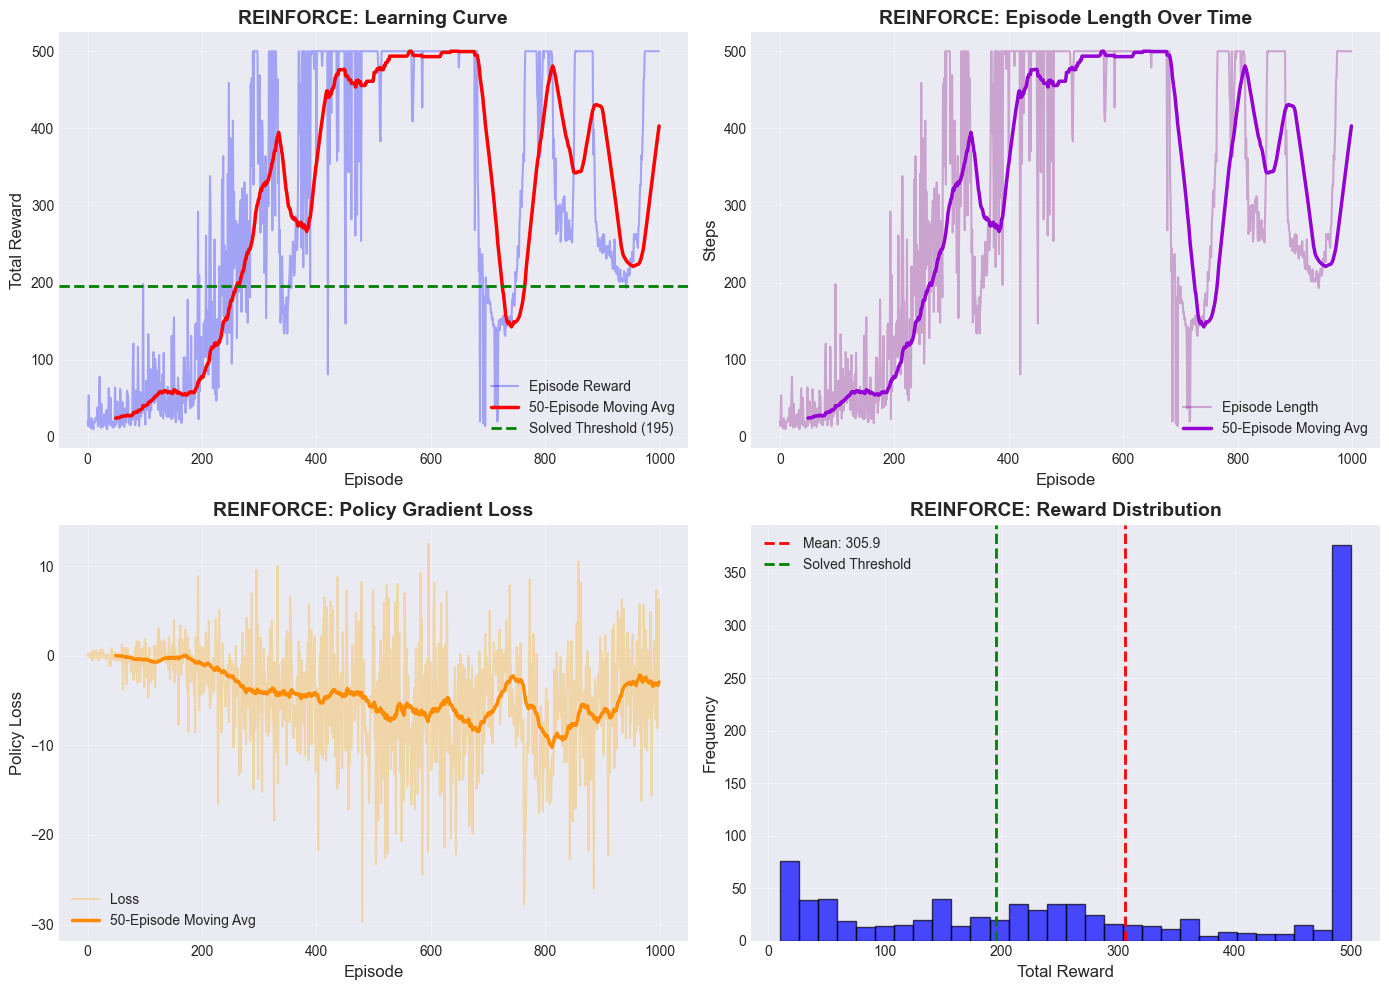

REINFORCE Training Summary
Total episodes: 1000
Mean reward: 305.94
Max reward: 500.00
Final 100 episodes avg: 313.12
✓ Environment SOLVED at episode 287!


In [98]:
# Visualize REINFORCE training results

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Episode rewards
ax1 = axes[0, 0]
ax1.plot(reinforce_results['rewards'], alpha=0.3, color='blue', label='Episode Reward')
# Moving average
window = 50
if len(reinforce_results['rewards']) >= window:
    ma = np.convolve(reinforce_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(reinforce_results['rewards'])), ma, 
             color='red', linewidth=2.5, label=f'{window}-Episode Moving Avg')
ax1.axhline(y=195, color='green', linestyle='--', linewidth=2, label='Solved Threshold (195)')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('REINFORCE: Learning Curve', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Episode lengths
ax2 = axes[0, 1]
ax2.plot(reinforce_results['lengths'], alpha=0.3, color='purple', label='Episode Length')
if len(reinforce_results['lengths']) >= window:
    ma_len = np.convolve(reinforce_results['lengths'], np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(reinforce_results['lengths'])), ma_len, 
             color='darkviolet', linewidth=2.5, label=f'{window}-Episode Moving Avg')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Steps', fontsize=12)
ax2.set_title('REINFORCE: Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

# Plot 3: Training loss
ax3 = axes[1, 0]
ax3.plot(reinforce_results['losses'], alpha=0.3, color='orange', label='Loss')
if len(reinforce_results['losses']) >= window:
    ma_loss = np.convolve(reinforce_results['losses'], np.ones(window)/window, mode='valid')
    ax3.plot(range(window-1, len(reinforce_results['losses'])), ma_loss, 
             color='darkorange', linewidth=2.5, label=f'{window}-Episode Moving Avg')
ax3.set_xlabel('Episode', fontsize=12)
ax3.set_ylabel('Policy Loss', fontsize=12)
ax3.set_title('REINFORCE: Policy Gradient Loss', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Reward distribution
ax4 = axes[1, 1]
ax4.hist(reinforce_results['rewards'], bins=30, alpha=0.7, color='blue', edgecolor='black')
ax4.axvline(x=np.mean(reinforce_results['rewards']), color='red', 
            linestyle='--', linewidth=2, label=f'Mean: {np.mean(reinforce_results["rewards"]):.1f}')
ax4.axvline(x=195, color='green', linestyle='--', linewidth=2, label='Solved Threshold')
ax4.set_xlabel('Total Reward', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('REINFORCE: Reward Distribution', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("" + "=" * 60)
print("REINFORCE Training Summary")
print("=" * 60)
print(f"Total episodes: {len(reinforce_results['rewards'])}")
print(f"Mean reward: {np.mean(reinforce_results['rewards']):.2f}")
print(f"Max reward: {np.max(reinforce_results['rewards']):.2f}")
print(f"Final 100 episodes avg: {np.mean(reinforce_results['rewards'][-100:]):.2f}")

# Check if solved
solved_episodes = [i for i in range(100, len(reinforce_results['rewards'])) 
                   if np.mean(reinforce_results['rewards'][i-100:i]) >= 195]
if solved_episodes:
    print(f"✓ Environment SOLVED at episode {solved_episodes[0]}!")
else:
    print(f"✗ Environment not solved within {len(reinforce_results['rewards'])} episodes")

#### Understanding REINFORCE: Key Insights

**What We Observed:**

1. **High Variance**: Notice the noisy learning curve - this is characteristic of REINFORCE. The returns can vary significantly between episodes, leading to unstable updates.

2. **Monte Carlo Nature**: REINFORCE waits until the end of each episode to update. This means:
   - Learning is slower (one update per episode)
   - But the return estimates are unbiased

3. **Normalization Helps**: We normalized returns in our implementation, which acts as a simple baseline and reduces variance.

**Strengths of REINFORCE:**
- Simple and elegant algorithm
- Unbiased gradient estimates
- Works with any differentiable policy
- Foundation for more advanced methods

**Weaknesses of REINFORCE:**
- High variance leads to slow learning
- Sample inefficient (needs many episodes)
- Sensitive to hyperparameters
- Can be unstable in complex environments

**Next: Actor-Critic Methods**

To address REINFORCE's high variance, we can use a learned value function as a baseline. This leads us to **Actor-Critic** methods, which combine the best of policy gradients and value-based learning!

#### Actor-Critic Methods

**The Best of Both Worlds**

Actor-Critic methods combine policy gradient methods (the "actor") with value function estimation (the "critic"). This hybrid approach addresses the high variance problem of REINFORCE while maintaining the benefits of policy gradients.

**Architecture Overview:**

- **Actor**: A policy network $\pi_\theta(a|s)$ that decides which actions to take
- **Critic**: A value network $V_\phi(s)$ that evaluates how good states are

The critic provides a learned baseline for the actor's updates, significantly reducing variance.

**The Advantage Function:**

Instead of using raw returns $G_t$, Actor-Critic uses the **advantage**:

$A(s_t, a_t) = Q(s_t, a_t) - V(s_t)$

The advantage tells us how much better an action is compared to the average action in that state.

In practice, we estimate the advantage using TD error:

$\hat{A}_t = r_t + \gamma V(s_{t+1}) - V(s_t)$

This is called the **TD advantage** or **one-step advantage**.

**Actor-Critic Update Rules:**

**Critic Update** (minimize TD error):
$\phi \leftarrow \phi - \alpha_c abla_\phi (r_t + \gamma V_\phi(s_{t+1}) - V_\phi(s_t))^2$

**Actor Update** (policy gradient with advantage):
$\theta \leftarrow \theta + \alpha_a abla_\theta \log \pi_\theta(a_t|s_t) \hat{A}_t$

**Key Benefits:**

1. **Lower Variance**: The critic provides a stable baseline
2. **Online Learning**: Can update after every step (not just episodes)
3. **Better Sample Efficiency**: Learns faster than pure policy gradient
4. **Flexible**: Can use different architectures for actor and critic

**Common Variants:**

- **A2C (Advantage Actor-Critic)**: Synchronous version with multiple workers
- **A3C (Asynchronous Advantage Actor-Critic)**: Parallel workers updating asynchronously
- **GAE (Generalized Advantage Estimation)**: Better advantage estimates using multiple steps

Let's implement a basic Actor-Critic agent!

In [99]:
# Actor-Critic Implementation

class ActorNetwork(nn.Module):
    """Actor network that outputs action probabilities."""
    
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super(ActorNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, state):
        return self.network(state)


class CriticNetwork(nn.Module):
    """Critic network that estimates state values V(s)."""
    
    def __init__(self, state_dim, hidden_dim=128):
        super(CriticNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, state):
        return self.network(state)


class ActorCriticAgent:
    """Actor-Critic agent using TD advantage.
    
    Combines policy gradient (actor) with value function estimation (critic)
    for lower variance and better sample efficiency.
    """
    
    def __init__(self, state_dim, action_dim, actor_lr=0.001, critic_lr=0.001, gamma=0.99):
        """Initialize Actor-Critic agent.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of discrete actions
            actor_lr: Learning rate for actor
            critic_lr: Learning rate for critic
            gamma: Discount factor
        """
        self.gamma = gamma
        
        # Actor (policy) network
        self.actor = ActorNetwork(state_dim, action_dim)
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        
        # Critic (value) network
        self.critic = CriticNetwork(state_dim)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=critic_lr)
        
    def select_action(self, state):
        """Select action using the actor network."""
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        probs = self.actor(state_tensor)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action.item(), log_prob
    
    def get_value(self, state):
        """Get state value from critic."""
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        return self.critic(state_tensor)
    
    def update(self, state, action, reward, next_state, done, log_prob):
        """Update actor and critic using TD advantage.
        
        Args:
            state: Current state
            action: Action taken
            reward: Reward received
            next_state: Next state
            done: Whether episode ended
            log_prob: Log probability of action
        
        Returns:
            actor_loss: Actor loss value
            critic_loss: Critic loss value
        """
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)
        
        # Get current and next state values
        value = self.critic(state_tensor)
        next_value = self.critic(next_state_tensor)
        
        # Compute TD target and advantage
        if done:
            td_target = torch.tensor([[reward]], dtype=torch.float32)
        else:
            td_target = reward + self.gamma * next_value.detach()
        
        advantage = td_target - value
        
        # Update Critic (minimize TD error)
        critic_loss = advantage.pow(2).mean()
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        
        # Update Actor (policy gradient with advantage)
        actor_loss = -log_prob * advantage.detach()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        return actor_loss.item(), critic_loss.item()


print("Actor-Critic Agent implemented!")
print("Architecture:")
print("  ✓ Actor Network: Outputs action probabilities π(a|s)")
print("  ✓ Critic Network: Estimates state values V(s)")
print("Update mechanism:")
print("  ✓ TD Advantage: A = r + γV(s') - V(s)")
print("  ✓ Actor uses advantage for policy gradient")
print("  ✓ Critic minimizes TD error")

Actor-Critic Agent implemented!
Architecture:
  ✓ Actor Network: Outputs action probabilities π(a|s)
  ✓ Critic Network: Estimates state values V(s)
Update mechanism:
  ✓ TD Advantage: A = r + γV(s') - V(s)
  ✓ Actor uses advantage for policy gradient
  ✓ Critic minimizes TD error


In [100]:
def train_actor_critic(env_name='CartPole-v1', num_episodes=1000, actor_lr=0.001, 
                       critic_lr=0.001, gamma=0.99, print_every=100, seed=42):
    """Train an Actor-Critic agent on a Gym environment.
    
    Args:
        env_name: Name of the Gym environment
        num_episodes: Number of episodes to train
        actor_lr: Learning rate for actor
        critic_lr: Learning rate for critic
        gamma: Discount factor
        print_every: Print progress every N episodes
        seed: Random seed
    
    Returns:
        agent: Trained agent
        results: Dictionary with training metrics
    """
    # Set seeds
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    
    # Create environment
    env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    # Create agent
    agent = ActorCriticAgent(state_dim, action_dim, actor_lr=actor_lr, 
                             critic_lr=critic_lr, gamma=gamma)
    
    # Training metrics
    episode_rewards = []
    episode_lengths = []
    actor_losses = []
    critic_losses = []
    
    print(f"Training Actor-Critic on {env_name}")
    print(f"State dim: {state_dim}, Action dim: {action_dim}")
    print("=" * 60)
    
    for episode in range(num_episodes):
        state, _ = env.reset(seed=seed + episode)
        episode_reward = 0
        episode_actor_loss = []
        episode_critic_loss = []
        done = False
        steps = 0
        
        while not done:
            # Select action
            action, log_prob = agent.select_action(state)
            
            # Take action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Update agent (online, after every step)
            a_loss, c_loss = agent.update(state, action, reward, next_state, done, log_prob)
            
            episode_actor_loss.append(a_loss)
            episode_critic_loss.append(c_loss)
            episode_reward += reward
            state = next_state
            steps += 1
        
        # Store metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(steps)
        actor_losses.append(np.mean(episode_actor_loss))
        critic_losses.append(np.mean(episode_critic_loss))
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(episode_rewards[-print_every:])
            avg_length = np.mean(episode_lengths[-print_every:])
            print(f"Episode {episode + 1:4d} | "
                  f"Avg Reward: {avg_reward:7.2f} | "
                  f"Avg Length: {avg_length:6.1f}")
    
    env.close()
    
    results = {
        'rewards': episode_rewards,
        'lengths': episode_lengths,
        'actor_losses': actor_losses,
        'critic_losses': critic_losses
    }
    
    return agent, results


# Train Actor-Critic agent
print("Starting Actor-Critic training...")
ac_agent, ac_results = train_actor_critic(
    env_name='CartPole-v1',
    num_episodes=1000,
    actor_lr=0.001,
    critic_lr=0.001,
    gamma=0.99,
    print_every=100,
    seed=42
)

print("" + "=" * 60)
print("Training complete!")
print(f"Final average reward (last 100 episodes): {np.mean(ac_results['rewards'][-100:]):.2f}")

Starting Actor-Critic training...
Training Actor-Critic on CartPole-v1
State dim: 4, Action dim: 2
Episode  100 | Avg Reward:   10.78 | Avg Length:   10.8
Episode  200 | Avg Reward:   22.68 | Avg Length:   22.7
Episode  300 | Avg Reward:   53.71 | Avg Length:   53.7
Episode  400 | Avg Reward:   58.37 | Avg Length:   58.4
Episode  500 | Avg Reward:   50.05 | Avg Length:   50.0
Episode  600 | Avg Reward:    9.33 | Avg Length:    9.3
Episode  700 | Avg Reward:    9.48 | Avg Length:    9.5
Episode  800 | Avg Reward:    9.38 | Avg Length:    9.4
Episode  900 | Avg Reward:    9.34 | Avg Length:    9.3
Episode 1000 | Avg Reward:    9.40 | Avg Length:    9.4
Training complete!
Final average reward (last 100 episodes): 9.40
